<a href="https://colab.research.google.com/github/Aishwaryap015/IVP-Notebooks/blob/main/IVP_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🖼️ Spatial Filtering - Smoothing
**Author:** Aishwarya Priydarshni  

In this notebook, we apply different smoothing filters to an image using **Python + OpenCV**.  
We compare the results of **Mean, Gaussian, and Median filtering** for noise reduction.  

---


In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


Saving flower.jpeg to flower.jpeg


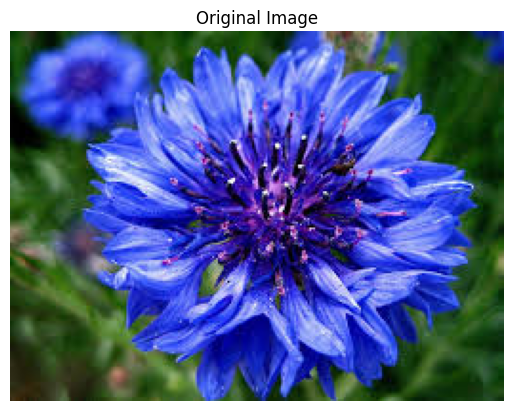

In [2]:
from google.colab import files
uploaded = files.upload()

# Read uploaded image
for fn in uploaded.keys():
    img = cv2.imread(fn)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.title("Original Image")
plt.axis("off")
plt.show()


In [3]:
# Mean Filter
mean_filtered = cv2.blur(img, (5,5))

# Gaussian Filter
gaussian_filtered = cv2.GaussianBlur(img, (5,5), 0)

# Median Filter
median_filtered = cv2.medianBlur(img, 5)

print("✅ Step 3 Completed: Applied Mean, Gaussian, and Median Filters")


✅ Step 3 Completed: Applied Mean, Gaussian, and Median Filters


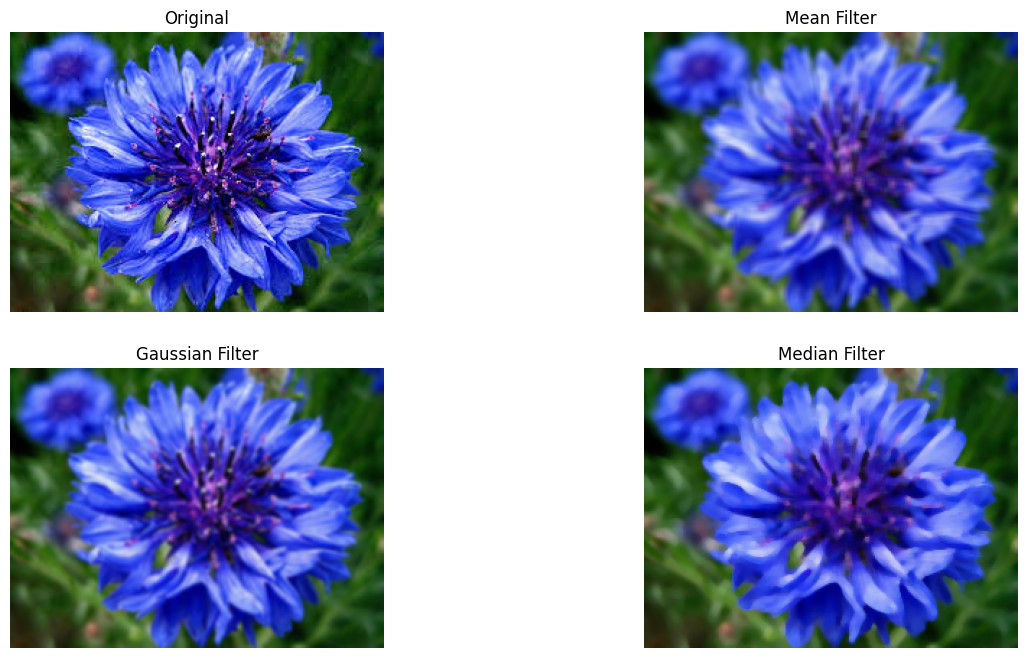

✅ Step 4 Completed: Visualization done


In [4]:
plt.figure(figsize=(15,8))

plt.subplot(2,2,1)
plt.imshow(img)
plt.title("Original")
plt.axis("off")

plt.subplot(2,2,2)
plt.imshow(mean_filtered)
plt.title("Mean Filter")
plt.axis("off")

plt.subplot(2,2,3)
plt.imshow(gaussian_filtered)
plt.title("Gaussian Filter")
plt.axis("off")

plt.subplot(2,2,4)
plt.imshow(median_filtered)
plt.title("Median Filter")
plt.axis("off")

plt.show()

print("✅ Step 4 Completed: Visualization done")


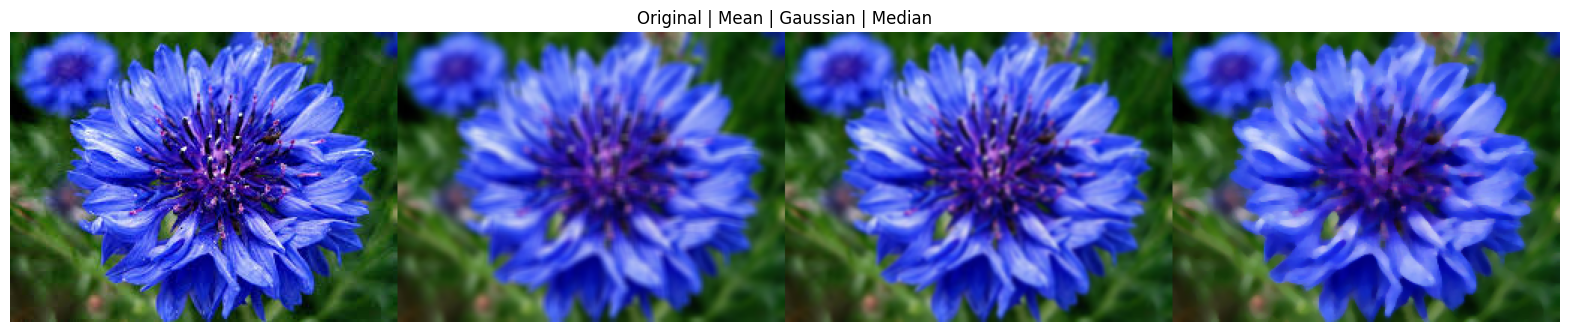

In [5]:
comparison = np.hstack((img, mean_filtered, gaussian_filtered, median_filtered))
plt.figure(figsize=(20,10))
plt.imshow(comparison)
plt.title("Original | Mean | Gaussian | Median")
plt.axis("off")
plt.show()


In [6]:
cv2.imwrite("mean_filtered.png", cv2.cvtColor(mean_filtered, cv2.COLOR_RGB2BGR))
cv2.imwrite("gaussian_filtered.png", cv2.cvtColor(gaussian_filtered, cv2.COLOR_RGB2BGR))
cv2.imwrite("median_filtered.png", cv2.cvtColor(median_filtered, cv2.COLOR_RGB2BGR))

from google.colab import files
files.download("mean_filtered.png")
files.download("gaussian_filtered.png")
files.download("median_filtered.png")

print("✅ Step 6 Completed: Results saved and ready for download")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✅ Step 6 Completed: Results saved and ready for download


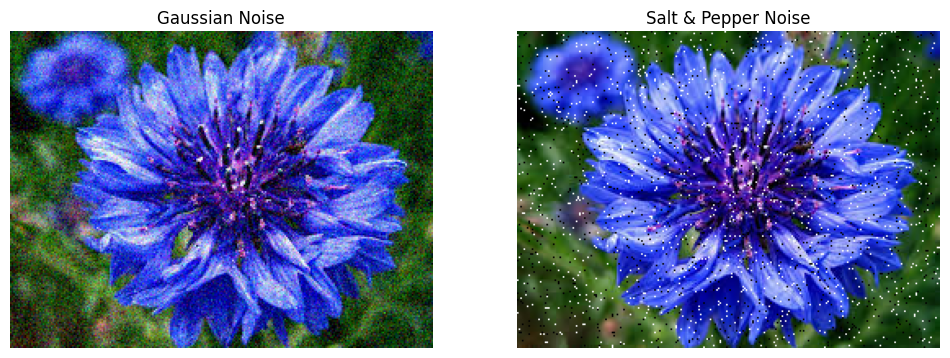

In [7]:
# Add Gaussian Noise
gaussian_noise = img + np.random.normal(0, 25, img.shape)
gaussian_noise = np.clip(gaussian_noise, 0, 255).astype(np.uint8)

# Add Salt & Pepper Noise
sp_noise = img.copy()
prob = 0.02  # noise probability
black = [0,0,0]
white = [255,255,255]
for i in range(sp_noise.shape[0]):
    for j in range(sp_noise.shape[1]):
        r = np.random.rand()
        if r < prob:
            sp_noise[i][j] = black
        elif r > 1 - prob:
            sp_noise[i][j] = white

plt.figure(figsize=(12,5))
plt.subplot(1,2,1), plt.imshow(gaussian_noise), plt.title("Gaussian Noise"), plt.axis("off")
plt.subplot(1,2,2), plt.imshow(sp_noise), plt.title("Salt & Pepper Noise"), plt.axis("off")
plt.show()


In [8]:
# Apply filters on Gaussian Noise
mean_g = cv2.blur(gaussian_noise, (5,5))
gaussian_g = cv2.GaussianBlur(gaussian_noise, (5,5), 0)
median_g = cv2.medianBlur(gaussian_noise, 5)

# Apply filters on Salt & Pepper Noise
mean_sp = cv2.blur(sp_noise, (5,5))
gaussian_sp = cv2.GaussianBlur(sp_noise, (5,5), 0)
median_sp = cv2.medianBlur(sp_noise, 5)

print("✅ Step 8 Completed: Filters applied on noisy images")


✅ Step 8 Completed: Filters applied on noisy images


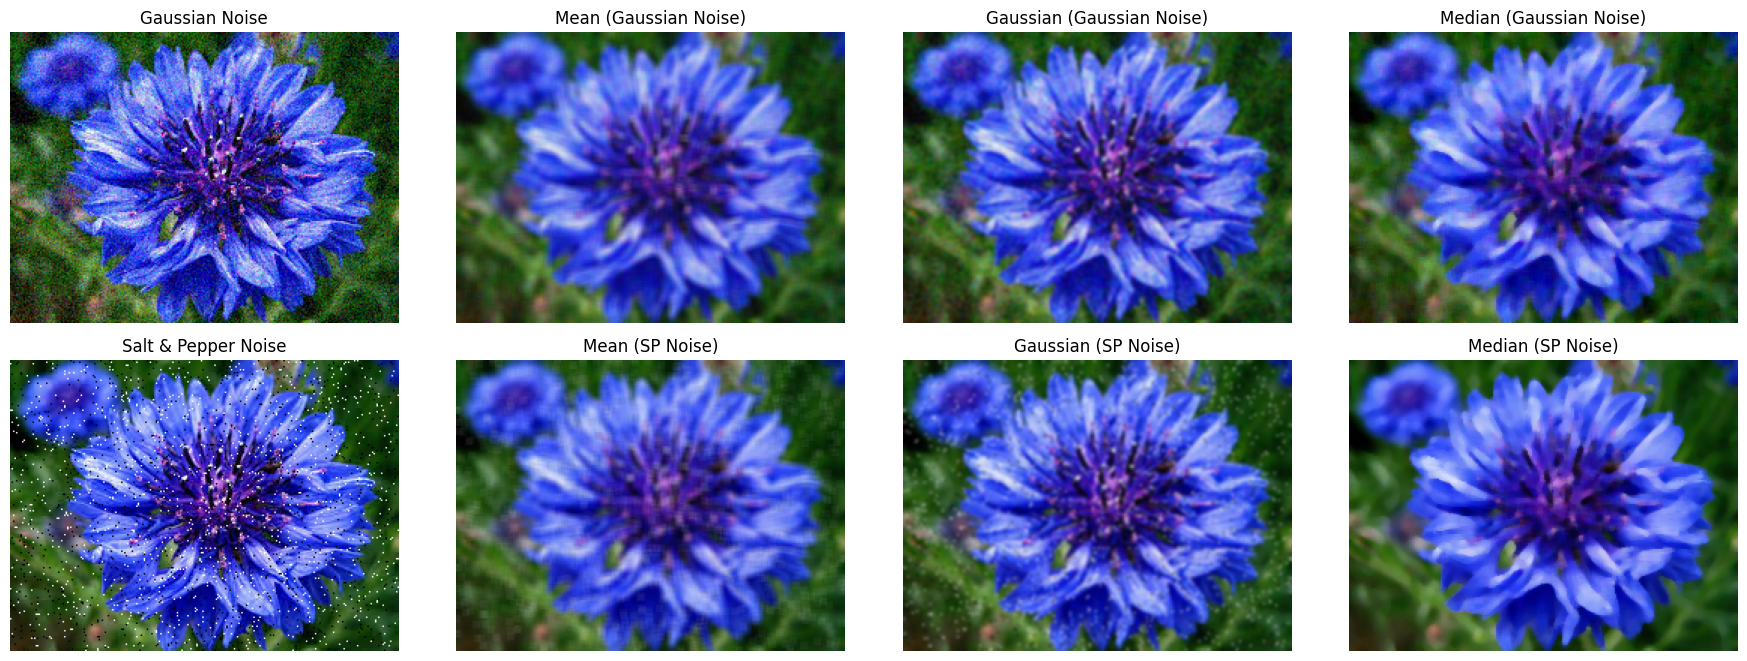

In [9]:
plt.figure(figsize=(18,10))

plt.subplot(3,4,1), plt.imshow(gaussian_noise), plt.title("Gaussian Noise"), plt.axis("off")
plt.subplot(3,4,2), plt.imshow(mean_g), plt.title("Mean (Gaussian Noise)"), plt.axis("off")
plt.subplot(3,4,3), plt.imshow(gaussian_g), plt.title("Gaussian (Gaussian Noise)"), plt.axis("off")
plt.subplot(3,4,4), plt.imshow(median_g), plt.title("Median (Gaussian Noise)"), plt.axis("off")

plt.subplot(3,4,5), plt.imshow(sp_noise), plt.title("Salt & Pepper Noise"), plt.axis("off")
plt.subplot(3,4,6), plt.imshow(mean_sp), plt.title("Mean (SP Noise)"), plt.axis("off")
plt.subplot(3,4,7), plt.imshow(gaussian_sp), plt.title("Gaussian (SP Noise)"), plt.axis("off")
plt.subplot(3,4,8), plt.imshow(median_sp), plt.title("Median (SP Noise)"), plt.axis("off")

plt.tight_layout()
plt.show()


In [10]:
def mse(img1, img2):
    return np.mean((img1.astype("float") - img2.astype("float")) ** 2)

def psnr(img1, img2):
    mse_val = mse(img1, img2)
    if mse_val == 0:
        return float('inf')
    return 20 * np.log10(255.0 / np.sqrt(mse_val))

# Example: Compare Original vs Median Filter on SP noise
print("PSNR (SP Noise - Median):", psnr(img, median_sp))
print("MSE (SP Noise - Median):", mse(img, median_sp))


PSNR (SP Noise - Median): 23.22222970090071
MSE (SP Noise - Median): 309.64023670209235


In [11]:
data = {
    "Filter": ["Mean (SP)", "Gaussian (SP)", "Median (SP)",
               "Mean (Gaussian)", "Gaussian (Gaussian)", "Median (Gaussian)"],
    "PSNR": [
        round(psnr(img, mean_sp),2), round(psnr(img, gaussian_sp),2), round(psnr(img, median_sp),2),
        round(psnr(img, mean_g),2), round(psnr(img, gaussian_g),2), round(psnr(img, median_g),2)
    ],
    "MSE": [
        round(mse(img, mean_sp),2), round(mse(img, gaussian_sp),2), round(mse(img, median_sp),2),
        round(mse(img, mean_g),2), round(mse(img, gaussian_g),2), round(mse(img, median_g),2)
    ]
}

import pandas as pd
df = pd.DataFrame(data)
df


Filter   PSNR     MSE
0            Mean (SP)  21.81  428.90
1        Gaussian (SP)  23.60  283.53
2          Median (SP)  23.22  309.64
3      Mean (Gaussian)  21.99  411.55
4  Gaussian (Gaussian)  24.10  252.93
5    Median (Gaussian)  22.46  369.24